In [74]:
import pandas as pd

In [75]:
data = pd.read_csv('/content/horas_estudo.csv', delimiter=';')

In [79]:
data.duplicated().sum()

23

In [76]:
data['horas_estudo'] = data['horas_estudo'].str.replace(',', '.').astype(float)
data['nota_avaliacao'] = data['nota_avaliacao'].str.replace(',', '.').astype(float)

In [77]:
data

,horas_estudo,nota_avaliacao
0,16.07,40.05
1,20.41,66.49
2,34.29,91.50
3,34.10,87.09
4,32.34,69.30
...,...,...
118,6.22,34.24
119,12.71,48.54
120,36.25,93.54
121,5.59,56.66


In [45]:
data.describe()

,horas_estudo,nota_avaliacao
count,123.000000,123.000000
mean,20.594634,64.059106
std,11.140682,22.533967
min,0.380000,10.300000
25%,12.250000,48.155000
50%,19.430000,62.320000
75%,30.330000,86.260000
max,39.160000,100.000000


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
resumo = data.describe()

In [66]:
X = data[['horas_estudo']]
Y = data['nota_avaliacao']

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [68]:
# Criando uma instância do modelo de regressão linear
model = LinearRegression()

# Treinando o modelo com o conjunto de treino
model.fit(X_train, Y_train)

LinearRegression()

In [69]:
# Previsões com o conjunto de teste
Y_pred = model.predict(X_test)

# Calculando métricas de avaliação
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

print("RMSE (Root Mean Squared Error):", rmse)
print("R² Score:", r2)

RMSE (Root Mean Squared Error): 15.27674333974708
R² Score: 0.3709189799109127


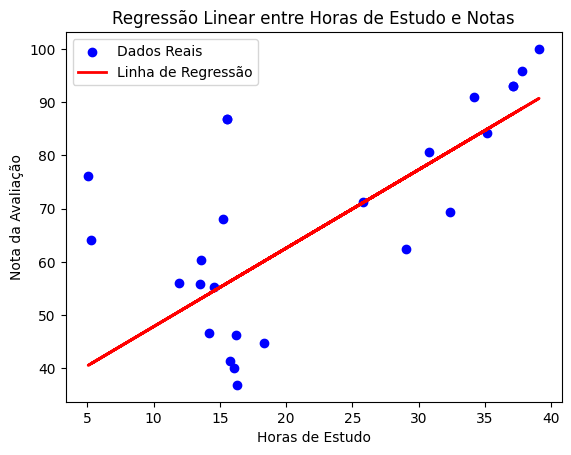

In [72]:
import matplotlib.pyplot as plt

plt.scatter(X_test, Y_test, color='blue', label='Dados Reais')

plt.plot(X_test, Y_pred, color='red', linewidth=2, label='Linha de Regressão')

# Adicionar rótulos e legenda
plt.title('Regressão Linear entre Horas de Estudo e Notas')
plt.xlabel('Horas de Estudo')
plt.ylabel('Nota da Avaliação')
plt.legend()

plt.show()

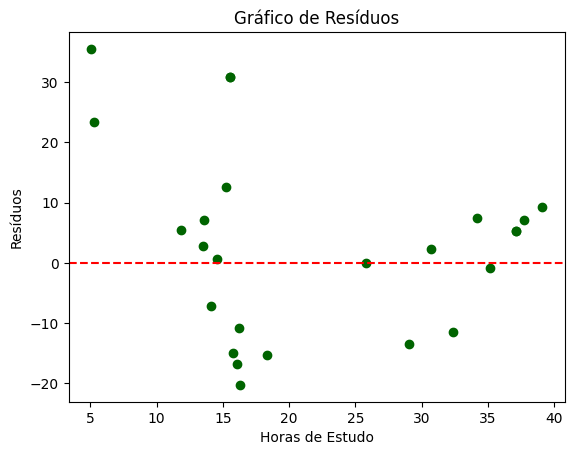

In [73]:
# Calculando resíduos
residuos = Y_test - Y_pred

# Plotando os resíduos
plt.scatter(X_test, residuos, color='darkgreen')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de Resíduos')
plt.xlabel('Horas de Estudo')
plt.ylabel('Resíduos')

plt.show()

#Fim Da Regressão Linear

In [71]:
resumo_estatistico = data.describe()
resumo_transposto = resumo_estatistico.transpose()

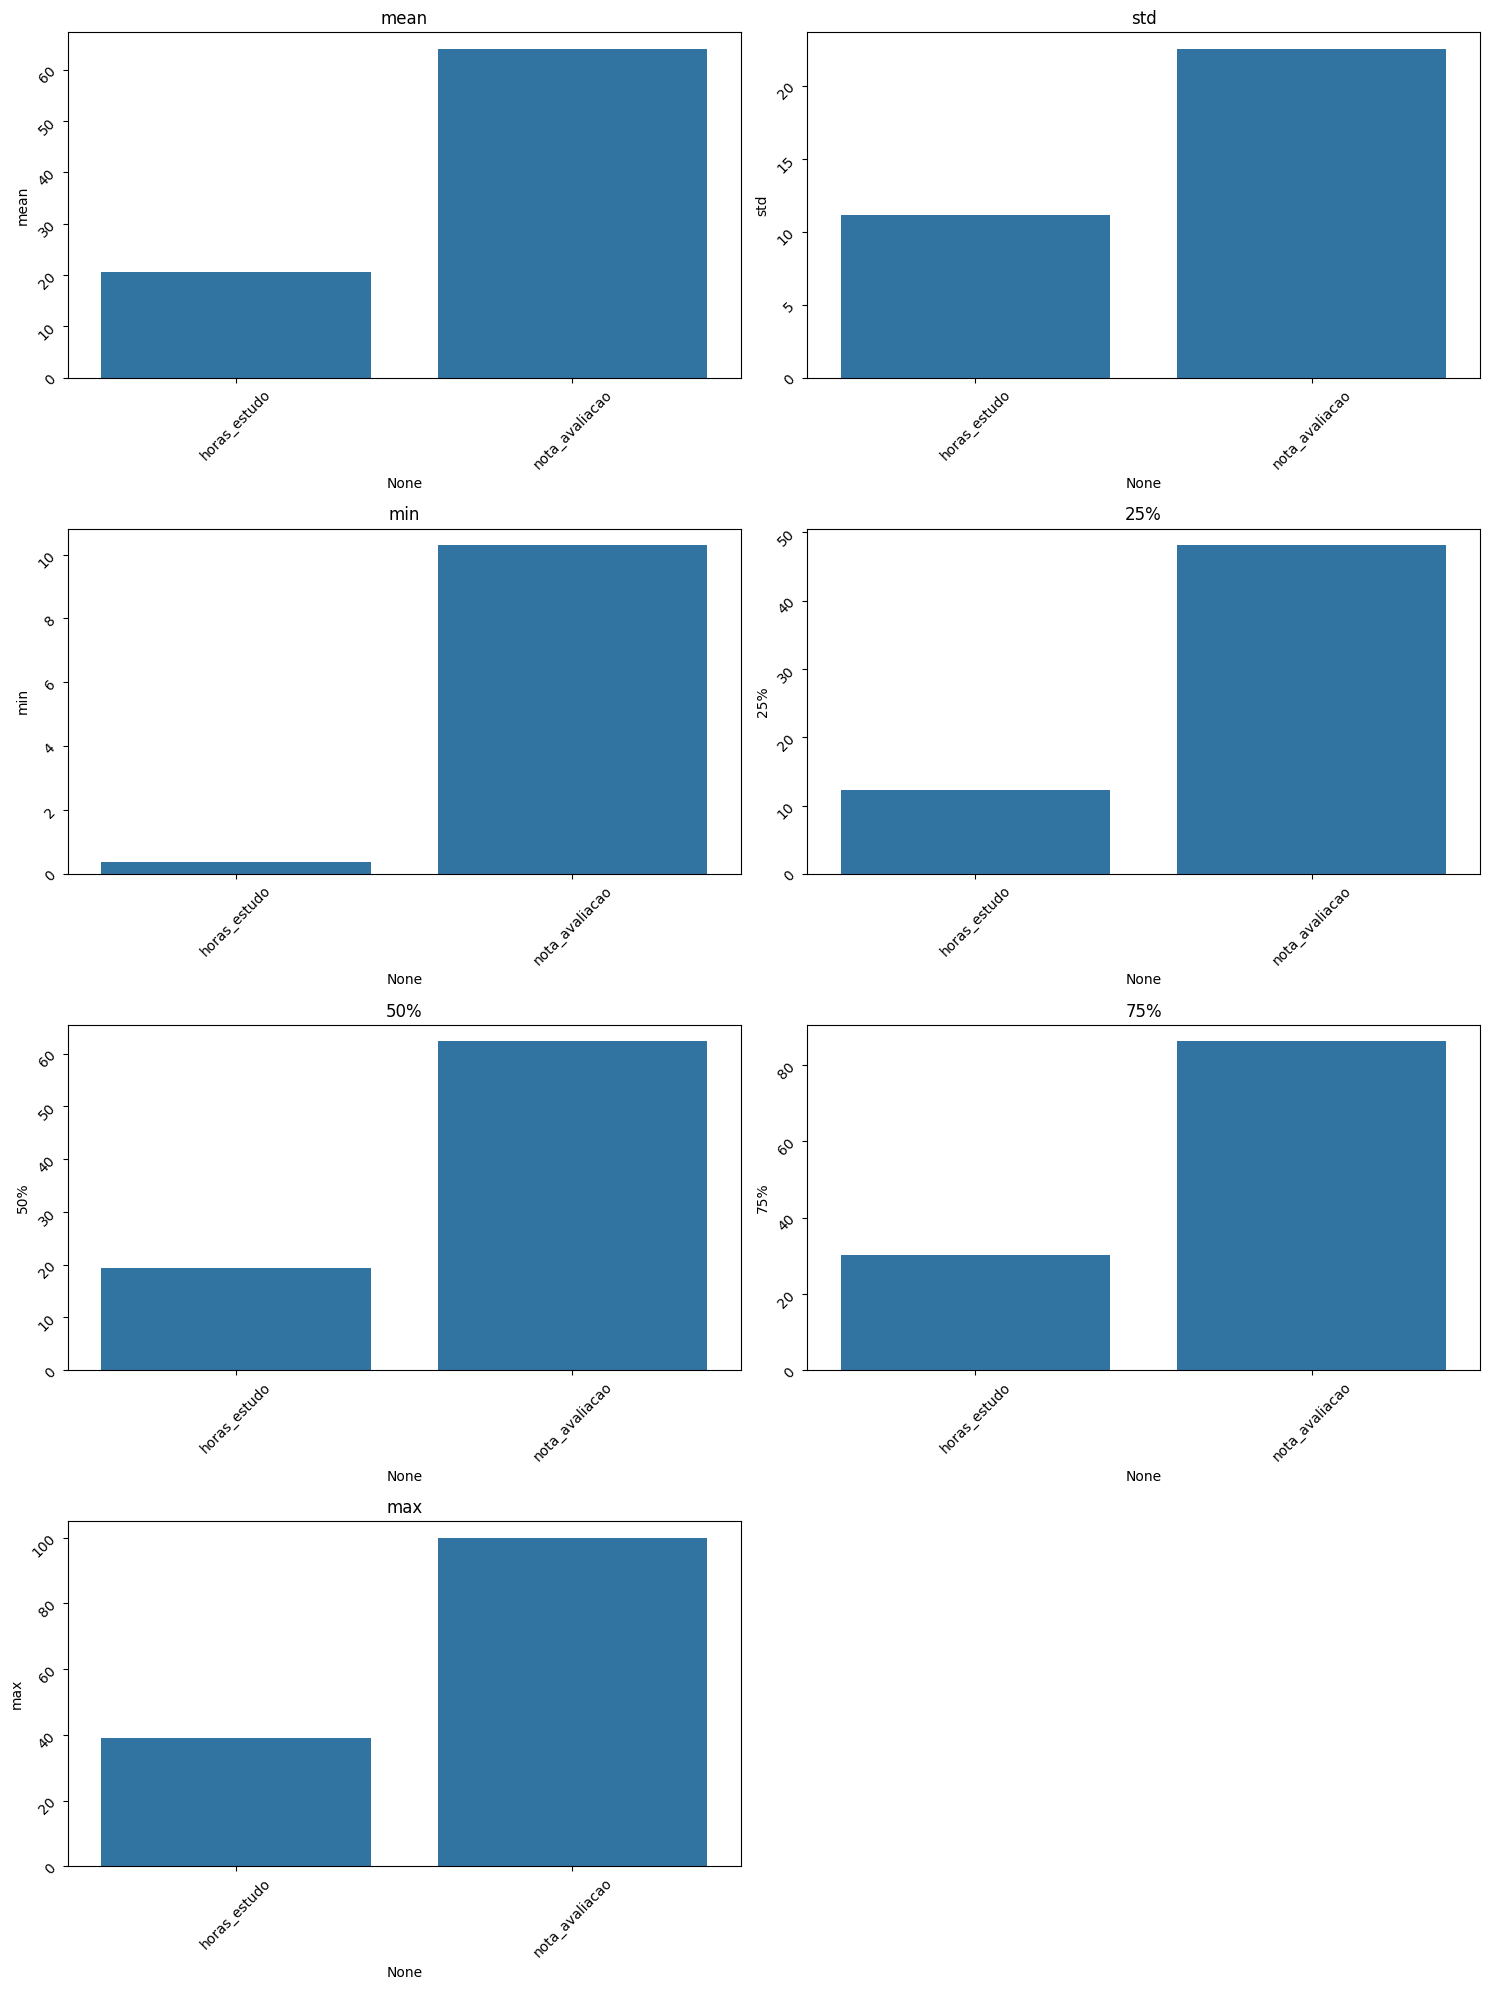

In [64]:
statistics = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']
num_stats = len(statistics)

# Calculando o layout dos subplots
n_cols = 2  # Número de colunas de subplots
n_rows = (num_stats + n_cols - 1) // n_cols  # Número de linhas, arredondado para cima

# Criando os subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 20))
axes = axes.flatten()

# Plotando cada estatística
for i, stat in enumerate(statistics):
    sns.barplot(ax=axes[i], x=resumo_transposto.index, y=resumo_transposto[stat])
    axes[i].set_title(stat)
    axes[i].tick_params(labelrotation=45)

# Escondendo eixos extras se existirem
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [80]:
print(model.intercept_)

33.08582100721529
